In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
variants = pd.read_csv("Input_data/variant_cases.csv", sep=",", index_col=0)

In [16]:
def drop_data(row):
    date = row["year_week"].split("-")
    if int(date[0]) == 2020:
        if int(date[1]) < 40:
            return "drop"

In [17]:
variants = variants.loc[(variants['variant'] == 'B.1.617.2') | (variants['variant'] == 'B.1.1.529') |\
                       (variants['variant'] == 'B.1.1.7') | (variants['variant'] == 'B.1.351')|
                        (variants['variant'] == 'P.1')]
variants["drop_column"] = variants.apply(drop_data, axis = 1)
variants = variants.loc[variants["drop_column"] != "drop"]
variants = variants.drop(columns = "drop_column")
variants

,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant
country,,,,,,,,,,,
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.1.529,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.1.7,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.351,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.617.2,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,P.1,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Sweden,SE,2022-08,TESSy,17642,3327,18.9,True,B.1.1.529,3324,3327.0,99.9
Sweden,SE,2022-08,TESSy,17642,3327,18.9,True,B.1.617.2,3,3327.0,0.1
Sweden,SE,2022-09,TESSy,12532,2572,20.5,True,B.1.1.529,2561,2572.0,99.6


In [18]:
sort_variants = variants.sort_values('number_sequenced')
var = sort_variants.drop_duplicates(subset=['country_code', 'year_week', 'variant'], keep='last')
variants = var.sort_values(by=['country_code','year_week'])
variants

,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant
country,,,,,,,,,,,
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.1.529,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.1.7,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.351,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,B.1.617.2,0,4.0,0.0
Austria,AT,2020-40,GISAID,5597,4,0.1,True,P.1,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Slovakia,SK,2022-10,GISAID,71256,1,0.0,True,B.1.1.7,0,1.0,0.0
Slovakia,SK,2022-10,GISAID,71256,1,0.0,True,B.1.351,0,1.0,0.0
Slovakia,SK,2022-10,GISAID,71256,1,0.0,True,B.1.617.2,0,1.0,0.0


In [19]:
def get_variants(row):
    percentage = row['percent_variant']/100
    cases = row['new_cases'] * percentage
    return cases
    
variants['number_cases_ratio'] = variants.apply(get_variants, axis=1)
variants = variants.drop(columns=['source', 'number_sequenced', 'percent_cases_sequenced', 'valid_denominator',\
                                  'number_detections_variant', 'number_sequenced_known_variant'])
variants

,country_code,year_week,new_cases,variant,percent_variant,number_cases_ratio
country,,,,,,
Austria,AT,2020-40,5597,B.1.1.529,0.0,0.0
Austria,AT,2020-40,5597,B.1.1.7,0.0,0.0
Austria,AT,2020-40,5597,B.1.351,0.0,0.0
Austria,AT,2020-40,5597,B.1.617.2,0.0,0.0
Austria,AT,2020-40,5597,P.1,0.0,0.0
...,...,...,...,...,...,...
Slovakia,SK,2022-10,71256,B.1.1.7,0.0,0.0
Slovakia,SK,2022-10,71256,B.1.351,0.0,0.0
Slovakia,SK,2022-10,71256,B.1.617.2,0.0,0.0


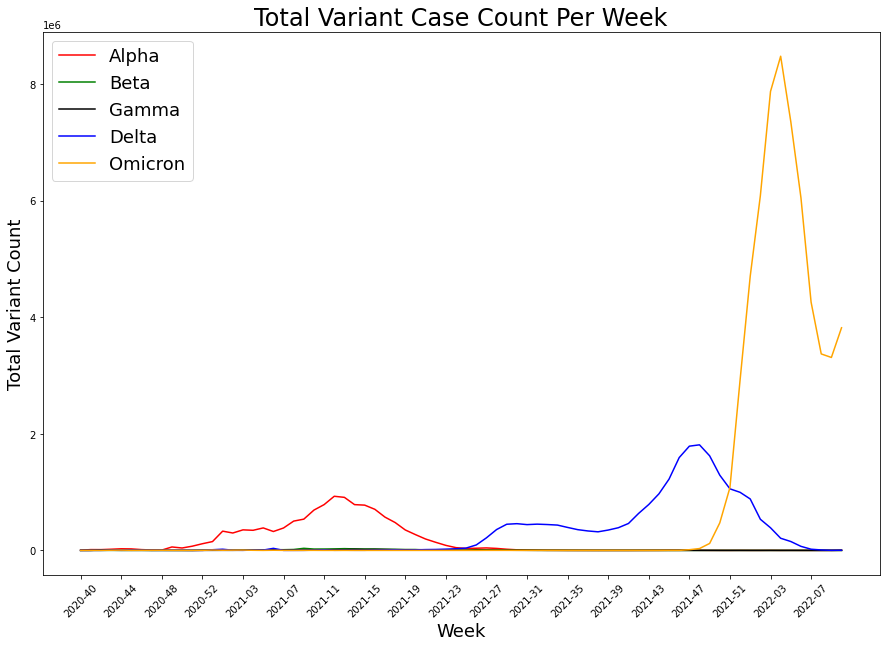

In [20]:
df = variants.groupby(by=['year_week', 'variant']).sum()
df = df.reset_index()
x = df['year_week'].unique()

plt.rcParams['figure.figsize']=(15,10)
fig, ax = plt.subplots()

ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.1.7'], label='Alpha', color="Red")
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.351'], label='Beta', color="Green")
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='P.1'], label='Gamma',color="Black")
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.617.2'], label='Delta',color="Blue")
ax.plot(x, df['number_cases_ratio'].loc[df['variant']=='B.1.1.529'], label="Omicron",color="Orange")

ax.set(xticks=x[::4])
plt.xticks(rotation = 45)
plt.title("Total Variant Case Count Per Week", fontsize=24)
plt.xlabel("Week", fontsize=18)
plt.ylabel("Total Variant Count", fontsize=18)
plt.legend(loc='upper left', prop={'size': 18})
plt.show()

fig.savefig('png_files/Figure_2.png')